In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits import mplot3d

# 1. Representing a (1-dimensional) curve using a single parameter `t`

Consider the three curves shown below:


 <img src="https://www.pinclipart.com/picdir/middle/165-1659326_transparent-simplify-curve-line-straight-shape-path-curve.png" width="200" height="200"> 

They may be drawn in two dimensions but they are actually 1D curves. We can represent such curves using a single parameter `t` (time).

### The idea is to think of a curve as a path taken by a point. 

### The position of the point at any time `t` is given by `(x(t), y(t))` (or `z(t)` if the path exists in three dimensions).

---

# 2. Standard examples

### Circle

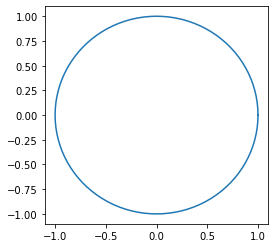

In [2]:
PI = 3.1415926535
times = [i/100 for i in range(101)]

x = lambda t: math.cos(2*PI*t)
y = lambda t: math.sin(2*PI*t)

xs = [x(t) for t in times]
ys = [y(t) for t in times]

plt.figure(figsize=(4,4))
plt.plot(xs,ys)

### Parabola

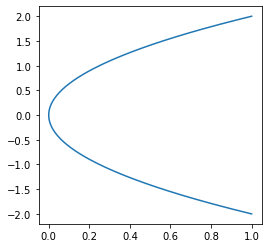

In [3]:
times = [i/100 for i in range(-100,101)]

x = lambda t: t**2
y = lambda t: 2*t

xs = [x(t) for t in times]
ys = [y(t) for t in times]

plt.figure(figsize=(4,4))
plt.plot(xs,ys)

### Ellipse

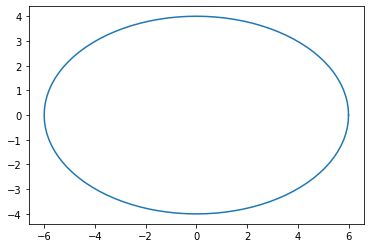

In [4]:
PI = 3.1415926535
times = [i/100 for i in range(101)]

x = lambda t: 6*math.cos(2*PI*t)
y = lambda t: 4*math.sin(2*PI*t)

xs = [x(t) for t in times]
ys = [y(t) for t in times]

# plt.figure(figsize=(6,6))
_ = plt.plot(xs,ys)

### Polynomial

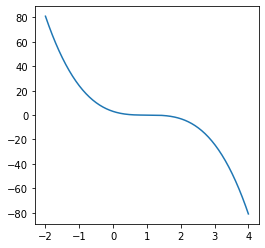

In [5]:
times = [i/50 for i in range(-100,201)]

x = lambda t: t
y = lambda t: 3*(1-t)**3

xs = [x(t) for t in times]
ys = [y(t) for t in times]

plt.figure(figsize=(4,4))
plt.plot(xs,ys)

---

# 3. Bezier curves

We have learned two things which we will combine to understand Bezier curves:

#### 1. Polynomials can be treated as vector spaces (i.e. you can add two polynomials or multiply a scalar to a polynomial just like a vector). __They can also have different basis vectors.__

#### 2. We can represent a curve parametrically using a variable `t`. The coordinates `x`, `y`, `z` etc of a point on the curve at time `t`  are functions of the variable `t`.

Consider a basis of a quadratic polynomial:

$f_1 = (1-t)^2, \\
f_2 = 2t(1-t), \\
f_3 = t^2$

A point $(x_1, x_2, x_3)$ in this basis gives the polynomial:

$\begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}$ $\begin{bmatrix} (1-t)^2 \\ 2t(1-t) \\ t^2 \end{bmatrix}$ = $x_1.(1-t)^2 + x_2.2t.(1-t) + x_3.t^2$

Similarly a point $(y_1, y_2, y_3)$ in this basis gives the polynomial:

$\begin{bmatrix} y_1 & y_2 & y_3 \end{bmatrix}$ $\begin{bmatrix} (1-t)^2 \\ 2t(1-t) \\ t^2 \end{bmatrix}$ = $y_1.(1-t)^2 + y_2.2t.(1-t) + y_3.t^2$

You can look at these polynomials as parametric curves i.e. you can _define_ the position of a point on the curve at time `t` along `x` and `y` axes as:

$
x(t) = x_1.(1-t)^2 + x_2.2t.(1-t) + x_3.t^2 \\
y(t) = y_1.(1-t)^2 + y_2.2t.(1-t) + y_3.t^2
$

The Bezier curve is simple `y` plotted vs `x`. The plots are shown below:

In [6]:
B1 = lambda t: (1-t)**2
B2 = lambda t: 2*t*(1-t)
B3 = lambda t: t**2

times = [i/100 for i in range(101)]

#### Question: What do you think is the sum of these curves (i.e. with weights = 1 for each curve)?

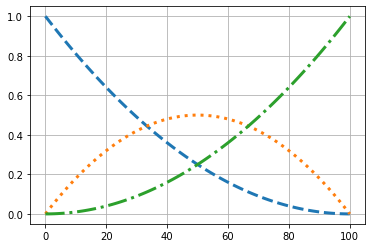

In [7]:
plt.grid()
_ = plt.plot([B1(t) for t in times], ls="--", lw=3)
_ = plt.plot([B2(t) for t in times], ls=":", lw=3)
_ = plt.plot([B3(t) for t in times], ls="-.", lw=3)
# _ = plt.plot([B1(t)+B2(t)+B3(t) for t in times])

### $x(t) = 0.1t^2 + 1.5*2t(1-t) + 0.8*(1-t)^2$ 

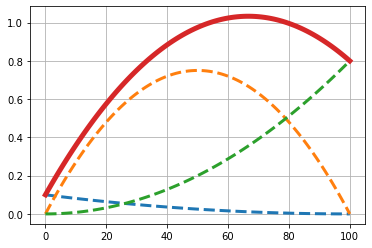

In [8]:
x_weights = [0.1, 1.5, 0.8]

plt.grid()
_ = plt.plot([B1(t) * x_weights[0] for t in times], ls="--", lw=3)
_ = plt.plot([B2(t) * x_weights[1] for t in times], ls="--", lw=3)
_ = plt.plot([B3(t) * x_weights[2] for t in times], ls="--", lw=3)

xs = [B1(t) * x_weights[0] + B2(t) * x_weights[1] + B3(t) * x_weights[2] for t in times]
_ = plt.plot(xs, lw=5)

### $y(t) = 1.1t^2 + 0.5*2t(1-t) + 2.8*(1-t)^2$ 

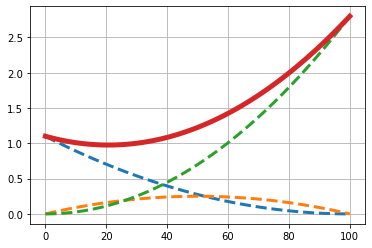

In [9]:
y_weights = [1.1, 0.5, 2.8]

plt.grid()
_ = plt.plot([B1(t) * y_weights[0] for t in times], ls="--", lw=3)
_ = plt.plot([B2(t) * y_weights[1] for t in times], ls="--", lw=3)
_ = plt.plot([B3(t) * y_weights[2] for t in times], ls="--", lw=3)
ys = [B1(t) * y_weights[0] + B2(t) * y_weights[1] + B3(t) * y_weights[2] for t in times]
_ = plt.plot(ys, lw=5)

### Plotting `y` vs `x` gives us the Bezier curve:

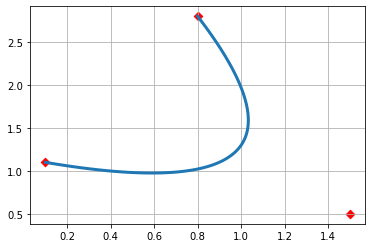

In [10]:
plt.grid()
_ = plt.plot(xs, ys, lw=3)
_ = plt.scatter(x_weights, y_weights, marker='D', c='red')

---

# 4. Compact representation of Bezier curves and generalization

We would like to represent the points $\begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}$ and $\begin{bmatrix} y_1 & y_2 & y_3 \end{bmatrix}$ in _normal_ basis $\begin{bmatrix} 1 \\ t \\ t^2 \end{bmatrix}$. 

Again we use the linear transformation:

$\begin{bmatrix} (1-t)^2 \\ 2t(1-t) \\ t^2 \end{bmatrix}$ = $\begin{bmatrix} 1 & -2 & 1 \\ 0 & 2 & -2 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ t \\ t^2 \end{bmatrix}$.

## 4.1 Generalizing to higher dimensions of points

### Thus the Bezier curve in two dimensions can be written down as:

$\begin{bmatrix} x_1 & x_2 & x_3 \\ y_1 & y_2 & y_3  \end{bmatrix} \begin{bmatrix} (1-t)^2 \\ 2t(1-t) \\ t^2 \end{bmatrix} = \begin{bmatrix} x_1 & x_2 & x_3 \\ y_1 & y_2 & y_3  \end{bmatrix} \begin{bmatrix} 1 & -2 & 1 \\ 0 & 2 & -2 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ t \\ t^2 \end{bmatrix}$.

### Generalizing it to Bezier curve in higher dimensions is pretty straight-forward now.

Here is what the Bezier curve for three dimensions looks like:

$\begin{bmatrix} x_1 & x_2 & x_3 \\ y_1 & y_2 & y_3 \\ z_1 & z_2 & z_3  \end{bmatrix} \begin{bmatrix} (1-t)^2 \\ 2t(1-t) \\ t^2 \end{bmatrix} = \begin{bmatrix} x_1 & x_2 & x_3 \\ y_1 & y_2 & y_3 \\ z_1 & z_2 & z_3  \end{bmatrix} \begin{bmatrix} 1 & -2 & 1 \\ 0 & 2 & -2 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ t \\ t^2 \end{bmatrix}$

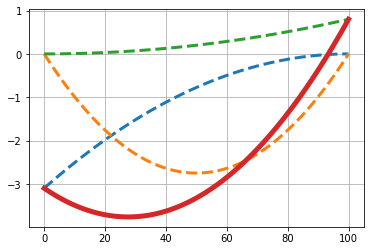

In [11]:
z_weights = [-3.1, -5.5, 0.8]

plt.grid()
_ = plt.plot([B1(t) * z_weights[0] for t in times], ls="--", lw=3)
_ = plt.plot([B2(t) * z_weights[1] for t in times], ls="--", lw=3)
_ = plt.plot([B3(t) * z_weights[2] for t in times], ls="--", lw=3)
zs = [B1(t) * z_weights[0] + B2(t) * z_weights[1] + B3(t) * z_weights[2] for t in times]
_ = plt.plot(zs, lw=5)

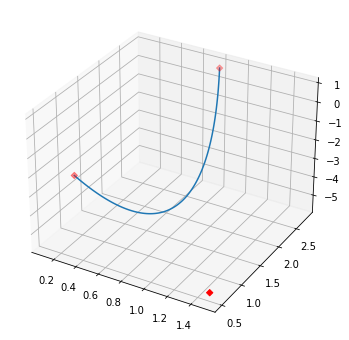

In [12]:
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
_ = ax.plot3D(xs,ys,zs)
_ = ax.scatter3D(x_weights, y_weights, z_weights, c='red', marker='D')

## 4.2 Generalizing to polynomials of higher order

We just used a polynomial of order 2 (a quadratic polynomial). For a polynomial of order 3, the basis is given by:

$\begin{bmatrix} (1-t)^3 \\ 3t(1-t)^2 \\ 3t^2(1-t) \\ t^3 \end{bmatrix}$

__Question__: do you see a pattern in how these basis vectors are calculated?

which can be written down in the _normal_ basis as:

$\begin{bmatrix} (1-t)^3 \\ 3t(1-t)^2 \\ 3t^2(1-t) \\ t^3 \end{bmatrix}$
= $\begin{bmatrix} 1 & -3 & 3 & -1 \\ 0 & 3 & -6 & 3 \\ 0 & 0 & 3 & -3 \\ 0 & 0 & 0 & 1 \end{bmatrix}$ $\begin{bmatrix} 1 \\ t \\ t^2 \\ t^3  \end{bmatrix}$

### A cubic Bezier curve in two dimensions can be written down as:

$\begin{bmatrix} x_1 & x_2 & x_3 & x_4 \\ y_1 & y_2 & y_3 & y_4  \end{bmatrix} \begin{bmatrix} (1-t)^3 \\ 3t(1-t)^2 \\ 3t^2(1-t) \\ t^3 \end{bmatrix} = \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \\ y_1 & y_2 & y_3 & y-4  \end{bmatrix} \begin{bmatrix} 1 & -3 & 3 & -1 \\ 0 & 3 & -6 & 3 \\ 0 & 0 & 3 & -3 \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ t \\ t^2 \\ t^3  \end{bmatrix}$

### and in three dimensions it simply looks like:

$\begin{bmatrix} x_1 & x_2 & x_3 & x_4 \\ y_1 & y_2 & y_3 & y_4 \\ z_1 & z_2 & z_3 & z_4  \end{bmatrix} \begin{bmatrix} (1-t)^3 \\ 3t(1-t)^2 \\ 3t^2(1-t) \\ t^3 \end{bmatrix} = \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \\ y_1 & y_2 & y_3 & y_4 \\ z_1 & z_2 & z_3 & z_4  \end{bmatrix} \begin{bmatrix} 1 & -3 & 3 & -1 \\ 0 & 3 & -6 & 3 \\ 0 & 0 & 3 & -3 \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ t \\ t^2 \\ t^3  \end{bmatrix}$

In [13]:
B1 = lambda t: (1-t)**3
B2 = lambda t: 3 * t * ((1-t)**2)
B3 = lambda t: 3 * (t**2) * (1-t)
B4 = lambda t: t**3

times = [i/100 for i in range(101)]

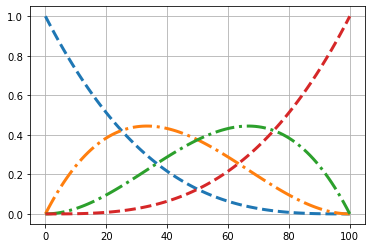

In [14]:
plt.grid()
_ = plt.plot([B1(t) for t in times], ls="--", lw=3)
_ = plt.plot([B2(t) for t in times], ls="-.", lw=3)
_ = plt.plot([B3(t) for t in times], ls="-.", lw=3)
_ = plt.plot([B4(t) for t in times], ls="--", lw=3)

In [15]:
x_weights = [0.1, 1.5, 0.8, -2]
xs = [B1(t) * x_weights[0] + B2(t) * x_weights[1] + B3(t) * x_weights[2] + B4(t) * x_weights[3] for t in times]

y_weights = [2.1, 3.5, -3.8, 2]
ys = [B1(t) * y_weights[0] + B2(t) * y_weights[1] + B3(t) * y_weights[2] + B4(t) * y_weights[3] for t in times]

z_weights = [-3.1, 1.5, 7.8, -5]
zs = [B1(t) * z_weights[0] + B2(t) * z_weights[1] + B3(t) * z_weights[2] + B4(t) * z_weights[3] for t in times]

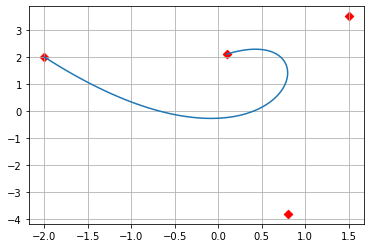

In [16]:
plt.grid()
_ = plt.scatter(x_weights, y_weights, c='red', marker='D')
_ = plt.plot(xs, ys)

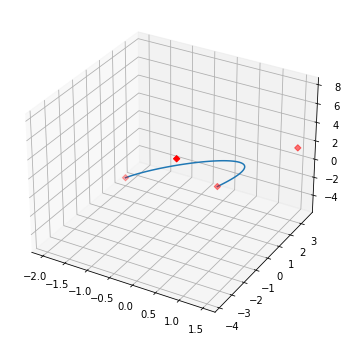

In [17]:
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
_ = ax.plot3D(xs,ys,zs)
_ = ax.scatter3D(x_weights, y_weights, z_weights, c='red', marker='D')

---

# 5. Geometric properties of Bezier curve

## 5.1 The curve interpolates (i.e. exactly passes through) the end points and approximates (i.e. does not pass through) the remaining points

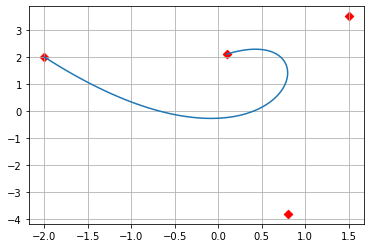

In [18]:
plt.grid()
_ = plt.scatter(x_weights, y_weights, c='red', marker='D')
_ = plt.plot(xs, ys)

## 5.2 The curve always lies inside the convex hull of the specified points

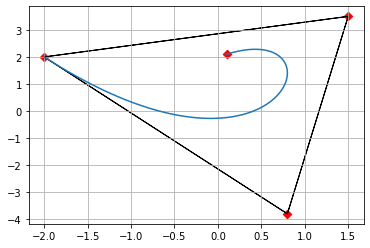

In [19]:
plt.grid()
_ = plt.scatter(x_weights, y_weights, c='red', marker='D')
plt.arrow(x_weights[-1], y_weights[-1], x_weights[1]-x_weights[-1], y_weights[1]-y_weights[-1])
plt.arrow(x_weights[2], y_weights[2], x_weights[1]-x_weights[2], y_weights[1]-y_weights[2])
plt.arrow(x_weights[-1], y_weights[-1], x_weights[2]-x_weights[-1], y_weights[2]-y_weights[-1])
_ = plt.plot(xs, ys)

## 5.3 The gradient of the curve at first point is in the direction of first point to second point. Similar the gradient of the curve at last point is in the direction of last point to second last point.

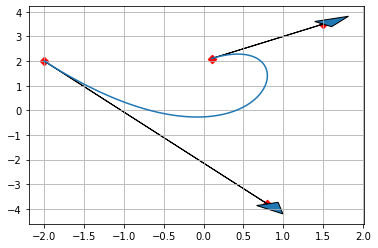

In [20]:
plt.grid()

_ = plt.arrow(x_weights[0], y_weights[0], x_weights[1]-x_weights[0], y_weights[1]-y_weights[0], head_width=0.3)
_ = plt.arrow(x_weights[-1], y_weights[-1], x_weights[-2]-x_weights[-1], y_weights[-2]-y_weights[-1], head_width=0.3)
_ = plt.scatter(x_weights, y_weights, c='red', marker='D')
_ = plt.plot(xs, ys)

